# Chains in LangChain

### Outline
- LLMChain
- Sequential Chains
    - SimpleSequentialChain
    - SequentialChain
- Router Chain

In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [44]:
import pandas as pd
df = pd.read_csv('Data.csv')

In [45]:
df.head()

,Product,Review
0,Queen Size Sheet Set,I ordered a king size set. My only criticism w...
1,Waterproof Phone Pouch,"Loved the waterproof sac, although the openi..."
2,Luxury Air Mattress,This mattress had a small hole in the top of i...
3,Pillows Insert,This is the best throw pillow fillers on Amazo...
4,Milk Frother Handheld,I loved this product. But they only seem to l...


In [48]:
%pip install --upgrade langchain langchain-community

Defaulting to user installation because normal site-packages is not writeable
  Using cached langchain-0.3.17-py3-none-any.whl (1.0 MB)
     |████████████████████████████████| 2.5 MB 1.9 MB/s eta 0:00:01
  Using cached langchain_core-0.3.33-py3-none-any.whl (412 kB)
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.1.53
    Uninstalling langchain-core-0.1.53:
      Successfully uninstalled langchain-core-0.1.53
  Attempting uninstall: langchain-text-splitters
    Found existing installation: langchain-text-splitters 0.0.2
    Uninstalling langchain-text-splitters-0.0.2:
      Successfully uninstalled langchain-text-splitters-0.0.2
  Attempting uninstall: langchain
    Found existing installation: langchain 0.1.17
    Uninstalling langchain-0.1.17:
      Successfully uninstalled langchain-0.1.17
  Attempting uninstall: langchain-community
    Found existing installation: langchain-community 0.0.38
    Uninstalling langchain-community-0.0.38:
      

### LLMChain

In [50]:
from langchain_community.llms import Ollama
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain


In [51]:
llm = Ollama(
    model="llama3.2",
    temperature=0.9
)

In [52]:
prompt = ChatPromptTemplate.from_template(
    "What is the best name for a company that makes {product}?"
)

In [53]:
chain = LLMChain(llm=llm, prompt=prompt)

In [61]:
product = "Queen Size Sheet Set"
chain.run(product=product)

"Here are some suggestions for a queen-size sheet set company:\n\n1. **Sheet Sanctuary**: This name evokes a sense of comfort and relaxation, which is perfect for a bedding company.\n2. **Queen's Rest**: This name emphasizes the idea of getting a good night's sleep, which is exactly what customers are looking for in a sheet set.\n3. **Bedroom Bliss**: This name conveys a sense of happiness and satisfaction, which is sure to appeal to customers.\n4. **Sheets & Co.**: Simple and straightforward, this name gets the point across while also leaving room for creative branding.\n5. **DreamWeave**: This name suggests that the company's products can help customers create a restful and rejuvenating sleep environment.\n6. **The Sheet Company**: This name is short and to the point, emphasizing the focus on sheets and bedding.\n7. **Rest & Renew**: This name emphasizes the idea of getting a good night's sleep and starting the day feeling refreshed and renewed.\n8. **Pure Slumber**: This name convey

### Sequential Chains
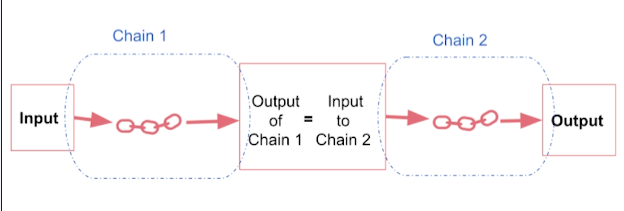

Sequential chains is another type of chains.
The idea is to combine multiple chains where the output of one chain is the input of the next chain.

There is two type of sequential chains:
1. SimpleSequentialChain: Single input and single output
2. SequentialChain: Multiple inputs and multiple outputs

In [54]:
from langchain.chains import SimpleSequentialChain

In [65]:
llm = Ollama(
    model="llama3.2",
    temperature=0.9
)

first_prompt = ChatPromptTemplate.from_template(
    "What is the best name for a company that makes {product}?"
)

chain_one = LLMChain(llm=llm, prompt=first_prompt)

In [68]:
second_prompt = ChatPromptTemplate.from_template(
    "Write a 20 words description for the following \
    company:{input}"
)

chain_two = LLMChain(llm=llm, prompt=second_prompt)

In [69]:
overall_simple_chain = SimpleSequentialChain(chains=[chain_one, chain_two],
                                             verbose=True
                                            )

In [70]:
overall_simple_chain.run(product)



> Entering new SimpleSequentialChain chain...
Here are some suggestions for a Queen size sheet set company:

1. **Cozy Rest**: This name conveys the idea of getting a good night's sleep, which is what people expect from their bed linens.
2. **Sheets & Co.**: Simple and straightforward, this name highlights the product while leaving room for creative branding.
3. **DreamWeave**: This name evokes a sense of softness, comfort, and quality, suggesting that your sheets will help customers dream sweet dreams.
4. **Rest Easy Bedding**: This name emphasizes the importance of a good night's sleep and positions your company as a solution to that problem.
5. **Bedtime Bliss**: Who wouldn't want to associate their bed with bliss? This name creates an emotional connection with potential customers.
6. **Linen & Luxe**: If you're using high-end materials, this name highlights the luxury aspect of your product.
7. **Sleep Sanctuary**: This name positions your company as a provider of peaceful, resto

'I\'d be happy to help you choose a 20-word description for your Queen size sheet set company. Based on the options provided, I would suggest:\n\n"Soft, luxurious sheets designed to cradle you in comfort, ensuring a restful night\'s sleep and a fresh new morning ahead."\n\nThis description highlights the key benefits of your product - softness, luxury, and quality - while also evoking a sense of relaxation and rejuvenation. It\'s short, catchy, and communicates the value proposition of your brand.\n\nAlternatively, you could choose to modify any of the original suggestions to better fit your company\'s values and personality. For example:\n\n* If you want to emphasize the eco-friendly aspect of your products, you could use a description like: "Gently woven sheets made from sustainable materials for a restful night\'s sleep."\n* If you want to focus on the high-end quality of your products, you could use a description like: "Luxurious Queen size sheet sets crafted with premium fabrics a

### SequentialChain

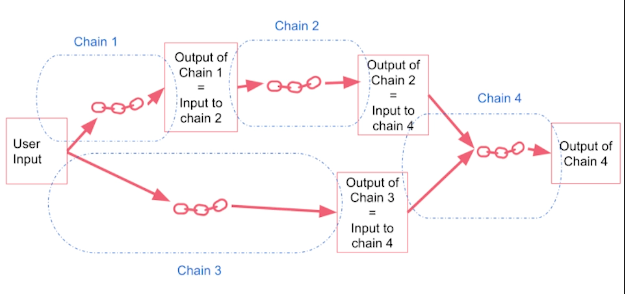

In [80]:
from langchain.chains import SequentialChain

In [72]:
llm = Ollama(
    model="llama3.2",
    temperature=0.9
)

first_prompt = ChatPromptTemplate.from_template(
    "Translate the following review to english:"
    "\n\n{Review}"
)

chain_one = LLMChain(llm=llm, prompt=first_prompt, output_key="English_Review")

In [73]:
second_prompt = ChatPromptTemplate.from_template(
    "Can you summarize the following review in 1 sentence:"
    "\n\n{English_Review}"
)

chain_two = LLMChain(llm=llm, prompt=second_prompt, 
                     output_key="summary"
                    )

In [74]:
third_prompt = ChatPromptTemplate.from_template(
    "What language is the following review:\n\n{Review}"
)

chain_three = LLMChain(llm=llm, prompt=third_prompt,
                       output_key="language"
                      )

In [76]:
fourth_prompt = ChatPromptTemplate.from_template(
    "Write a follow up response to the following "
    "summary in the specified language:"
    "\n\nSummary: {summary}\n\nLanguage: {language}"
)

chain_four = LLMChain(llm=llm, prompt=fourth_prompt,
                      output_key="followup_message"
                     )

In [77]:
overall_chain = SequentialChain(
    chains=[chain_one, chain_two, chain_three, chain_four],
    input_variables=["Review"],
    output_variables=["English_Review", "summary", "followup_message"],
    verbose=True
)

In [79]:
review = df.Review[4]
overall_chain(review)



> Entering new SequentialChain chain...

> Finished chain.


{'Review': 'I loved this product. But they only seem to l...',
 'English_Review': 'It looks like the translation is incomplete or interrupted. Could you please provide the rest of the sentence or the complete review? I\'d be happy to help translate it into English for you.\n\nHowever, based on the starting sentence "I loved this product," I\'m guessing that the review might be saying something negative about the price or availability of the product, and that the reviewer\'s love for the product itself is what they\'re trying to express. If that\'s the case, here\'s a possible translation:\n\n"I loved this product, but it seems like they only have [insert reason, e.g. limited quantity, high price]..."',
 'summary': "Unfortunately, I'm a large language model, I don't have any review text provided for me to summarize or translate. The conversation started with your question about summarizing a review, but no review was shared. If you'd like to share the review text, I'd be happy to help!"

### Router Chain
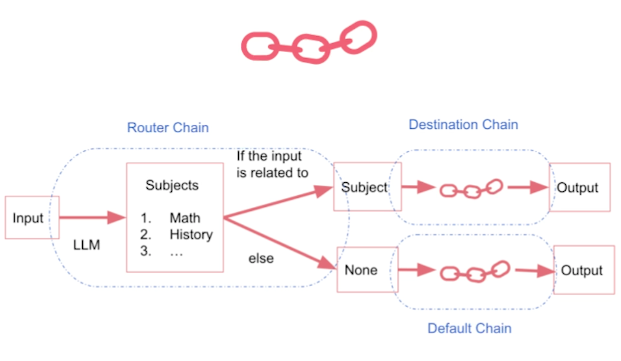

In [81]:
physics_template = """You are a very smart physics professor. \
You are great at answering questions about physics in a concise\
and easy to understand manner. \
When you don't know the answer to a question you admit\
that you don't know.

Here is a question:
{input}"""


math_template = """You are a very good mathematician. \
You are great at answering math questions. \
You are so good because you are able to break down \
hard problems into their component parts, 
answer the component parts, and then put them together\
to answer the broader question.

Here is a question:
{input}"""

history_template = """You are a very good historian. \
You have an excellent knowledge of and understanding of people,\
events and contexts from a range of historical periods. \
You have the ability to think, reflect, debate, discuss and \
evaluate the past. You have a respect for historical evidence\
and the ability to make use of it to support your explanations \
and judgements.

Here is a question:
{input}"""


computerscience_template = """ You are a successful computer scientist.\
You have a passion for creativity, collaboration,\
forward-thinking, confidence, strong problem-solving capabilities,\
understanding of theories and algorithms, and excellent communication \
skills. You are great at answering coding questions. \
You are so good because you know how to solve a problem by \
describing the solution in imperative steps \
that a machine can easily interpret and you know how to \
choose a solution that has a good balance between \
time complexity and space complexity. 

Here is a question:
{input}"""

In [82]:
prompt_infos = [
    {
        "name": "physics", 
        "description": "Good for answering questions about physics", 
        "prompt_template": physics_template
    },
    {
        "name": "math", 
        "description": "Good for answering math questions", 
        "prompt_template": math_template
    },
    {
        "name": "History", 
        "description": "Good for answering history questions", 
        "prompt_template": history_template
    },
    {
        "name": "computer science", 
        "description": "Good for answering computer science questions", 
        "prompt_template": computerscience_template
    }
]

In [83]:
from langchain.chains.router import MultiPromptChain
from langchain.chains.router.llm_router import LLMRouterChain, RouterOutputParser
from langchain.prompts import PromptTemplate

In [84]:
llm = Ollama(
    model="llama3.2",
    temperature=0.9
)

In [85]:
destination_chains = {}
for p_info in prompt_infos:
    name = p_info["name"]
    prompt_template = p_info["prompt_template"]
    prompt = ChatPromptTemplate.from_template(template=prompt_template)
    chain = LLMChain(llm=llm, prompt=prompt)
    destination_chains[name] = chain  
    
destinations = [f"{p['name']}: {p['description']}" for p in prompt_infos]
destinations_str = "\n".join(destinations)

In [86]:
default_prompt = ChatPromptTemplate.from_template("{input}")
default_chain = LLMChain(llm=llm, prompt=default_prompt)

In [87]:
MULTI_PROMPT_ROUTER_TEMPLATE = """Given a raw text input to a \
language model select the model prompt best suited for the input. \
You will be given the names of the available prompts and a \
description of what the prompt is best suited for. \
You may also revise the original input if you think that revising\
it will ultimately lead to a better response from the language model.

<< FORMATTING >>
Return a markdown code snippet with a JSON object formatted to look like:
```json
{{{{
    "destination": string \ name of the prompt to use or "DEFAULT"
    "next_inputs": string \ a potentially modified version of the original input
}}}}
```

REMEMBER: "destination" MUST be one of the candidate prompt \
names specified below OR it can be "DEFAULT" if the input is not\
well suited for any of the candidate prompts.
REMEMBER: "next_inputs" can just be the original input \
if you don't think any modifications are needed.

<< CANDIDATE PROMPTS >>
{destinations}

<< INPUT >>
{{input}}

<< OUTPUT (remember to include the ```json)>>"""

In [88]:
router_template = MULTI_PROMPT_ROUTER_TEMPLATE.format(
    destinations=destinations_str
)
router_prompt = PromptTemplate(
    template=router_template,
    input_variables=["input"],
    output_parser=RouterOutputParser(),
)

router_chain = LLMRouterChain.from_llm(llm, router_prompt)

In [89]:
chain = MultiPromptChain(router_chain=router_chain, 
                         destination_chains=destination_chains, 
                         default_chain=default_chain, verbose=True
                        )

In [90]:
chain.run("What is black body radiation?")



> Entering new MultiPromptChain chain...
physics: {'input': 'What happens to the energy emitted by an object when it is at absolute zero temperature?'}
> Finished chain.


"At absolute zero temperature (-273°C or -459°F), all matter's molecular motion comes to a complete halt. This means that there are no longer any particles in constant motion, which in turn means there are no longer any collisions between particles.\n\nAs a result, the energy that was previously being emitted due to thermal motion (such as infrared radiation) is now zero. In other words, the object would be emitting no energy in the form of heat or light at absolute zero temperature."

In [91]:
chain.run("What is 2 + 2?")



> Entering new MultiPromptChain chain...
math: {'input': 'What are the basic rules of arithmetic in mathematics?'}
> Finished chain.


'Breaking down complex problems into their component parts can indeed help reveal the underlying structure and principles. Let\'s apply this approach to understand the basic rules of arithmetic in mathematics.\n\nTo start, we can identify some fundamental concepts that underlie arithmetic:\n\n1. **Operations**: Arithmetic involves a set of operations, which include:\n * Addition (+)\n * Subtraction (-)\n * Multiplication (× or *)\n * Division (/ or ÷)\n2. **Properties**: These operations are governed by certain properties, such as:\n * Commutativity: The order in which we add or multiply numbers does not change the result.\n * Associativity: When performing multiple operations, the order in which we perform them does not affect the final result.\n\nNow, let\'s consider some specific rules that follow from these properties:\n\n3. **The Commutative Property**: For any two numbers a and b:\na + b = b + a\n(For example, 2 + 3 = 3 + 2)\n\n4. **The Associative Property**: For any three numbe